In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [15]:
df=pd.read_csv("DB_Obesity.csv")

In [16]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [18]:
df.CAEC.unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [19]:
number = LabelEncoder()
df['Gender'] = number.fit_transform(df['Gender'])
df['CAEC'] = number.fit_transform(df['CAEC'])
df['family_history_with_overweight'] = number.fit_transform(df['family_history_with_overweight'])
df['CALC'] = number.fit_transform(df['CALC'])
df['MTRANS'] = number.fit_transform(df['MTRANS'])
df['NObeyesdad'] = number.fit_transform(df['NObeyesdad'] )
df['FAVC'] = number.fit_transform(df['FAVC'] )
df['SCC'] = number.fit_transform(df['SCC'] )
df['SMOKE'] = number.fit_transform(df['SMOKE'] )

In [20]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [21]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [71]:
X=df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']]
y=df["NObeyesdad"]

In [25]:
features_train, features_test, target_train, target_test = train_test_split(X,y,test_size = 0.20,random_state = 54)

In [27]:
model = GaussianNB()
model.fit(features_train, target_train)

pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)


print(accuracy)

0.5886524822695035


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(target_test, pred))

              precision    recall  f1-score   support

           0       0.59      0.97      0.73        63
           1       0.47      0.20      0.28        45
           2       0.32      0.55      0.41        67
           3       0.64      0.90      0.75        59
           4       0.99      1.00      0.99        66
           5       0.72      0.19      0.30        70
           6       0.56      0.19      0.28        53

    accuracy                           0.59       423
   macro avg       0.61      0.57      0.53       423
weighted avg       0.62      0.59      0.55       423



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
X=df[['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC']]

<AxesSubplot:xlabel='Height', ylabel='NObeyesdad'>

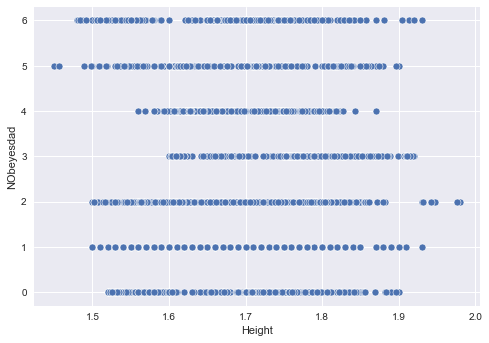

In [38]:
plt.figure()
sns.scatterplot(data=df,x="Height",y="NObeyesdad")

In [67]:
features_train, features_test, target_train, target_test = train_test_split(X,y,test_size = 0.20,random_state = 54)
model = GaussianNB()
model.fit(features_train, target_train)

pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)


print(accuracy)
print(classification_report(target_test, pred))

0.6808510638297872
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        63
           1       0.61      0.49      0.54        45
           2       0.68      0.39      0.50        67
           3       0.66      0.88      0.75        59
           4       0.88      1.00      0.94        66
           5       0.61      0.49      0.54        70
           6       0.41      0.53      0.46        53

    accuracy                           0.68       423
   macro avg       0.67      0.67      0.66       423
weighted avg       0.68      0.68      0.67       423



In [68]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameters = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.00000000001, 0.00000000000001]
}

grid_search=GridSearchCV(model,parameters,cv=10,scoring="neg_mean_squared_error",return_train_score=True)

In [81]:
grid_search.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-08, 1e-11, 1e-14]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [82]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 1e-14}